In [1]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *
import matplotlib.patheffects as pe
path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]


In [2]:
B_rad=5e3
B_tach=50.0
B_outer=3.0


B_rad_max = 3e7*1e-4
B_rad_min = 2e6*1e-4
print('B_rad between',B_rad_min,B_rad_max,'T')

B_tach_max = 50e4*1e-4
B_tach_min = 4e4*1e-4
print('B_tach between',B_tach_min,B_tach_max,'T')

B_outer_max = 4e4*1e-4
B_outer_min = 3e4*1e-4
print('B_outer between',B_outer_min,B_outer_max,'T')

B_rad between 200.0 3000.0 T
B_tach between 4.0 50.0 T
B_outer between 3.0 4.0 T


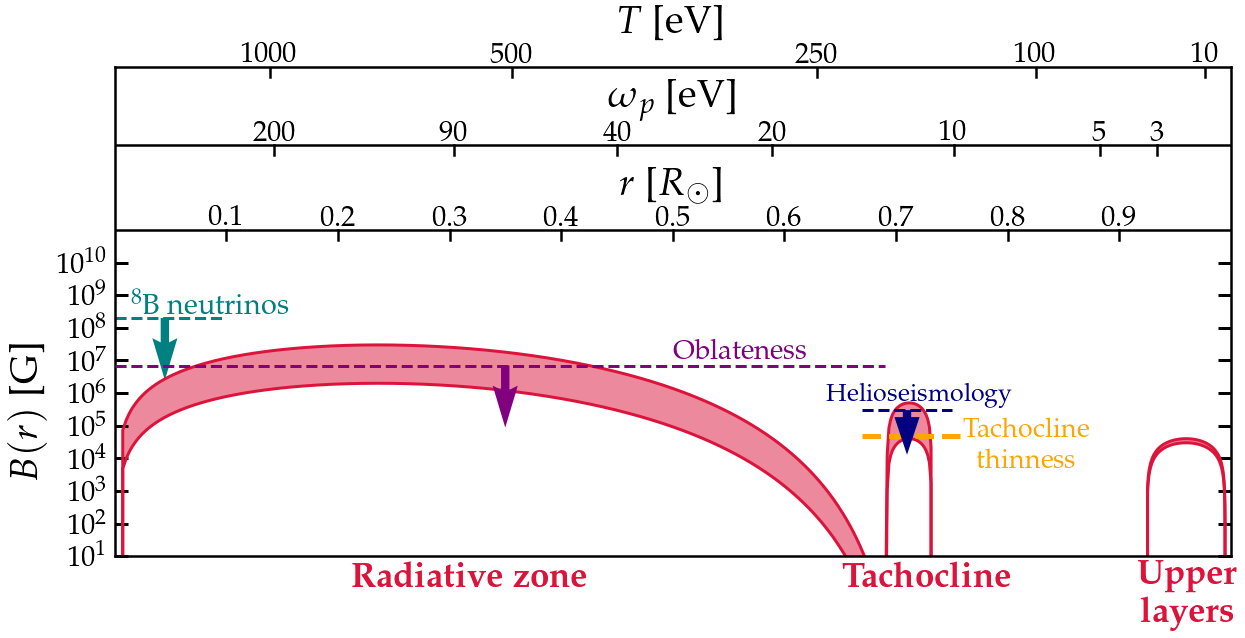

In [3]:
lfs = 39
tfs = 29
fig,ax = MySquarePlot('','$B(r)$ [G]',size_x=20,size_y=9,lfs=lfs,tfs=tfs)

Bcol = 'crimson'

B_max = B_model_seismic(B_rad=B_rad_max,B_tach=B_tach_max,B_outer=B_outer_max)
B_min = B_model_seismic(B_rad=B_rad_min,B_tach=B_tach_min,B_outer=B_outer_min)
plt.semilogy(r,1e4*B_max,lw=3,color=Bcol)
plt.semilogy(r,1e4*B_min,lw=3,color=Bcol)
plt.fill_between(r,1e4*B_max,1e4*B_min,color=Bcol,alpha=0.5)

ymax_max = 1e16


plt.yticks(logspace(-1,10,12))
plt.xticks([])
ax.tick_params(which='major',top=False,width=3,bottom=False)
ax.tick_params(which='minor',top=False,bottom=False)

wp_vals = array([200,90,40,20,10,5,3])/1000.0
ntx = size(wp_vals)
ymax = 4e13
col_ax = 'k'
for i in range(ntx):
    i_r = argmin(abs(wp_vals[i]-wp))
    ax.plot([r[i_r],r[i_r]],[ymax,ymax/2],color=col_ax,lw=2.5)
    plt.text(r[i_r]*1.0,ymax*1.4,str(int(wp_vals[i]*1000)),fontsize=tfs,color='k',rotation=0,rotation_mode='anchor',ha='center')
plt.plot([0,1],[ymax,ymax],'-',color=col_ax,zorder=2,alpha=1,lw=2.5)
plt.text(0.5,ymax*10,r'$\omega_p$ [eV]',color='k',ha='center',fontsize=lfs)

T_vals = array([1000,500,250,100.0,10])/1000
ntx = size(T_vals)
col_ax = 'k'
for i in range(ntx):
    i_r = argmin(abs(T_vals[i]-T))
    ax.plot([r[i_r],r[i_r]],[ymax_max,ymax_max/2],color=col_ax,lw=2.5)
    plt.text(r[i_r]*1.0,ymax_max*1.4,str(int(T_vals[i]*1000)),fontsize=tfs,color='k',rotation=0,rotation_mode='anchor',ha='center')
plt.text(0.5,ymax_max*10,r'$T$ [eV]',color='k',ha='center',fontsize=lfs)


r_vals = array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ntx = size(r_vals)
ymax = 1e11
col_ax = 'k'
for i in range(ntx):
    i_r = argmin(abs(r_vals[i]-r))
    ax.plot([r[i_r],r[i_r]],[ymax,ymax/2],color=col_ax,lw=2.5)
    plt.text(r[i_r]*1.0,ymax*1.4,str(r_vals[i]),fontsize=tfs,color='k',rotation=0,rotation_mode='anchor',ha='center')
plt.plot([0,1],[ymax,ymax],'-',color=col_ax,zorder=2,alpha=1,lw=2.5)
plt.text(0.5,ymax*8,r'$r$ [$R_\odot$]',color='k',ha='center',fontsize=lfs)


plt.xlim(left=0,right=1)
plt.ylim(top=ymax_max,bottom=1e1)

plt.gcf().text(0.29,0.078,r'{\bf Radiative zone}',color=Bcol,fontsize=35)
plt.gcf().text(0.63,0.078,r'{\bf Tachocline}',color=Bcol,fontsize=35)
plt.gcf().text(0.87,0.082,r'{\bf Upper}',color=Bcol,ha='center',fontsize=35)
plt.gcf().text(0.87,0.025,r'{\bf layers}',color=Bcol,ha='center',fontsize=35)


plt.plot([0,0.1],[2e8,2e8],'--',lw=3,color='teal')
plt.quiver(0.09/2,2e8,0,-10,lw=2,color='teal')
plt.text(0.015,2e8*1.3,r'$^8$B neutrinos',color='teal',fontsize=29)

plt.plot([0,0.69],[7e6,7e6],'--',lw=3,color='purple',zorder=10)
plt.quiver(0.7/2,7e6,0,-10,lw=2,color='purple',zorder=10)
plt.text(0.5,7e6*1.6,r'Oblateness',color='purple',fontsize=28)



plt.plot([0.67,0.76],[5e4,5e4],'--',lw=5,color='orange',zorder=10)
plt.text(0.76,5e4/10,'Tachocline \n thinness',color='orange',fontsize=27,multialignment='center')



plt.plot([0.67,0.75],[300e3,300e3],'--',lw=3,color='navy',zorder=10)
plt.quiver(0.71,300e3,0,-10,lw=1,color='navy',zorder=50,scale=250,headlength=4.5)
plt.text(0.72,300e3*2,'Helioseismology',color='navy',fontsize=25,ha='center')



ax.yaxis.set_label_coords(-0.06,0.3)


MySaveFig(fig,'Bfield')


In [4]:
def Br_Sensitivity(r0_vals,Bvals,m_a,Bfield=2.5,Length=20.0,Exposure=2.0,N_events=2.0):
    m_a = 1e-4
    N_events = 2.0

    nB = shape(r0_vals)[0]
    g = zeros(shape=(nB,nB))

    r_keV = r*Rsol_keV
    dwp = gradient(wp,r_keV)
    N_bores=8
    BoreDiameter=60.0
    eps_D=0.7
    eps_T=0.8
    gag_keV = 1e-10/1e6
    S_cm = N_bores*pi*(BoreDiameter/2.0)**2.0 # cm^2
    L_eV = Length/1.97e-7 # eV^-1
    t_secs = Exposure*3600*24*365 # s
    B = Bfield*(1e-19*195)
    norm = t_secs*S_cm*eps_D*eps_T*(B*L_eV/2.0)**2.0
    normq = L_eV/(4*1000)

    for i in range(0,nB):
        for j in range(0,nB):
            r0 = r0_vals[i]
            B = Bvals[j]*1e-4


            B = B*Tesla_2_keV  # B must be in Tesla

            # Point flux
            i_r = argmin(abs(r0-r))
            r0 = r_keV[i_r]
            w = wp[i_r]
            dPhi10 = keV_2_s*1/(12*pi*AU_cm**2.0)*(r0**2.0)*\
                        (w*w)*gag_keV**2.0*(B**2.0)/(exp(w/T[i_r])-1)*(1/abs(dwp[i_r-1]))
            Phi10 = dPhi10*w

            # Minimum coupling
            g[i,j] = 1e-10*(N_events/(norm*Phi10*(sinc(normq/pi*m_a**2.0/w))**2.0))**(1/4)

    return g

nB = 500
r0_vals = linspace(0.001,0.999,nB)
Bvals = logspace(4,10,nB)

m_a = 1e-4
        
g = Br_Sensitivity(r0_vals,Bvals,m_a,Bfield=2.5,Length=20.0,Exposure=2.0,N_events=2.0)
gplus = Br_Sensitivity(r0_vals,Bvals,m_a,Bfield=3.5,Length=22.0,Exposure=10.0,N_events=2.0)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: The following kwargs were not used by contour: 'color'
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'color'


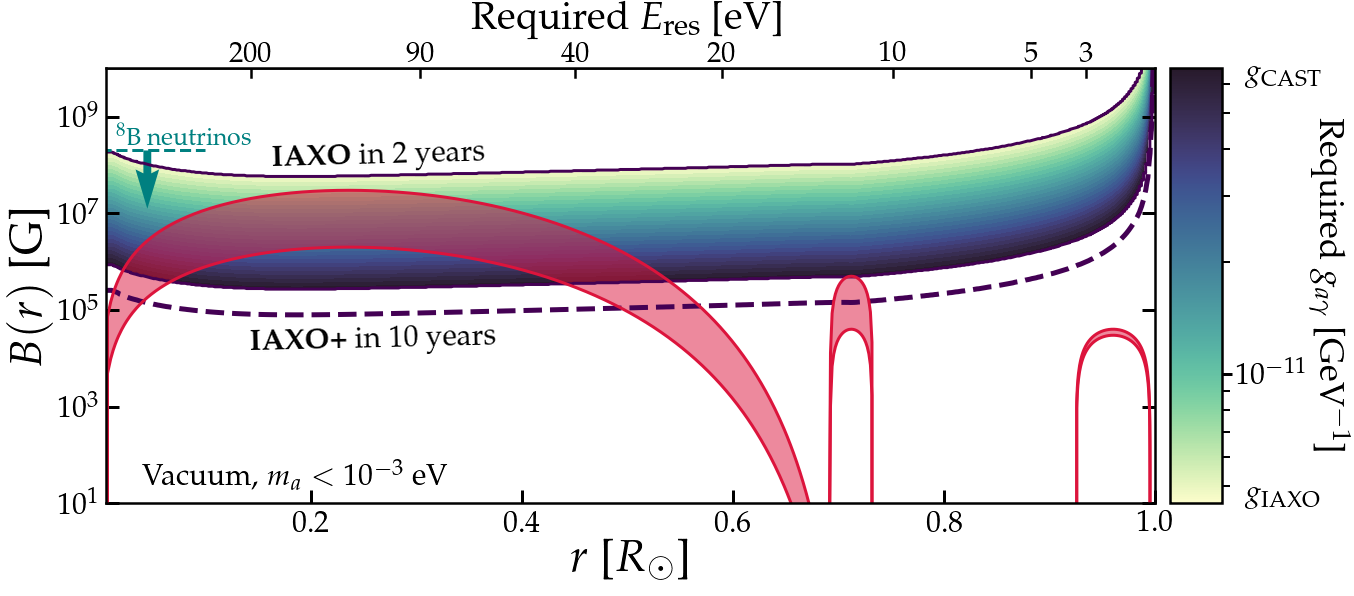

In [13]:
import cmocean

fig,ax = MySquarePlot('$r$ [$R_\odot$]','$B(r)$ [G]',size_x=20,size_y=8,tfs=30)



CAST = 6.6e-11
gmax = 6.6e-11
gmin = 4.5e-12


g[g>gmax] = 0
g[g<gmin] = 0

g_dummy = array([[gmax,gmax],[gmin,gmin]])
im = plt.pcolormesh(array([-0.1,-0.2]),array([1.0,1.0]),g_dummy,norm=colors.LogNorm(vmin=gmin,vmax=CAST),cmap=cmocean.cm.deep)

plt.contourf(r0_vals,Bvals,log10(g.T),levels=30,vmin=log10(gmin),vmax=log10(CAST),cmap=cmocean.cm.deep)
plt.contourf(r0_vals,Bvals,log10(g.T),levels=30,vmin=log10(gmin),vmax=log10(CAST),cmap=cmocean.cm.deep)

plt.contour(r0_vals,Bvals,g.T,levels=[gmin,gmax],linestyles='-',color='k',linewidths=3)

plt.contour(r0_vals,Bvals,gplus.T,levels=[gmax],linestyles='--',color='k',linewidths=5)


plt.yscale('log')



B_max = B_model_seismic(B_rad=B_rad_max,B_tach=B_tach_max,B_outer=B_outer_max)
B_min = B_model_seismic(B_rad=B_rad_min,B_tach=B_tach_min,B_outer=B_outer_min)
plt.semilogy(r,1e4*B_max,lw=3,color=Bcol)
plt.semilogy(r,1e4*B_min,lw=3,color=Bcol)
plt.fill_between(r,1e4*B_max,1e4*B_min,color=Bcol,alpha=0.5)
plt.xlim([0.006,1])
plt.ylim(bottom=10)



ax.tick_params(which='major',top=False,width=3)
ax.tick_params(which='minor',top=False)

wp_vals = array([200,90,40,20,10,5,3])/1000.0
ntx = size(wp_vals)
ymax = 1e10
col_ax = 'k'
for i in range(ntx):
    i_r = argmin(abs(wp_vals[i]-wp))
    ax.plot([r[i_r],r[i_r]],[ymax,ymax/1.5],color=col_ax,lw=2.5)
    plt.text(r[i_r]*1.0,ymax*1.4,str(int(wp_vals[i]*1000)),fontsize=tfs,color='k',rotation=0,rotation_mode='anchor',ha='center')
plt.plot([0,1],[ymax,ymax],'-',color=col_ax,zorder=2,alpha=1,lw=2.5)
plt.text(0.5,ymax*5,r'Required $E_{\rm res}$ [eV]',color='k',ha='center',fontsize=lfs)


# plt.gcf().text(0.24,0.08,r'{\bf Radiative zone}',color=Bcol)
# plt.gcf().text(0.6,0.08,r'{\bf Tachocline}',color=Bcol)
# plt.gcf().text(0.87,0.089,r'{\bf Upper}',color=Bcol,ha='center')
# plt.gcf().text(0.87,0.053,r'{\bf layers}',color=Bcol,ha='center')


plt.plot([0,0.1],[2e8,2e8],'--',lw=3,color='teal')
plt.quiver(0.09/2,2e8,0,-10,lw=2,color='teal')
plt.text(0.015,2e8*1.3,r'$^8$B neutrinos',color='teal',fontsize=25)

# plt.plot([0.67,0.75],[300e3,300e3],'--',lw=3,color='navy',zorder=10)
# plt.quiver(0.71,300e3,0,-10,lw=1,color='navy',zorder=10,scale=250,headlength=4.5)
# plt.text(0.72,300e3*2,'Helioseismology',color='navy',fontsize=20,ha='center')



cbar(im,label='Required $g_{a\gamma}$ [GeV$^{-1}$]')

plt.gcf().text(0.915,0.85,r'$g_{\rm CAST}$')
plt.gcf().text(0.915,0.12,r'$g_{\rm IAXO}$')
plt.gcf().text(0.24,0.71,r'{\bf IAXO} in 2 years',fontsize=30,rotation=1.5)
plt.gcf().text(0.225,0.39,r'{\bf IAXO+} in 10 years',fontsize=30,rotation=1.3)
plt.gcf().text(0.15,0.15,'Vacuum, $m_a < 10^{-3}$~eV')



MySaveFig(fig,'Bfield_sensitivity')


# Mean of the square of the derivative of the k=2 Legendre polynomial 

In [59]:
from scipy.special import legendre

costh = linspace(-1,1,10000)
dB = legendre(2)(costh)
dB = gradient(dB,arccos(costh))
print(trapz(dB**2.0,costh)/2)

1.1999998699530594
